In [1]:
import torch

In [3]:
x = torch.tensor([[1,2,3],[4,5,6],[7,8,9]])
print(x)
print("size:",x.size())
print("shape:",x.shape)
print("랭크:",x.ndimension())

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
size: torch.Size([3, 3])
shape: torch.Size([3, 3])
랭크: 2


In [4]:
x = torch.unsqueeze(x, 0)
print(x)
print("size:",x.size())
print("shape:",x.shape)
print("랭크:",x.ndimension())

tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])
size: torch.Size([1, 3, 3])
shape: torch.Size([1, 3, 3])
랭크: 3


In [5]:
x = torch.squeeze(x)
print(x)
print("size:",x.size())
print("shape:",x.shape)
print("랭크:",x.ndimension())

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
size: torch.Size([3, 3])
shape: torch.Size([3, 3])
랭크: 2


In [6]:
x = x.view(9)
print(x)
print("size:",x.size())
print("shape:",x.shape)
print("랭크:",x.ndimension())

tensor([1, 2, 3, 4, 5, 6, 7, 8, 9])
size: torch.Size([9])
shape: torch.Size([9])
랭크: 1


In [8]:
w = torch.randn(5,3, dtype = torch.float)
x = torch.tensor([[1.0,2.0],[3.0,4.0],[5.0,6.0]])
print("w size:", w.size())
print("x size:", x.size())
print("w:", w)
print("x:", x)

w size: torch.Size([5, 3])
x size: torch.Size([3, 2])
w: tensor([[ 1.4536, -0.9091, -0.3821],
        [-0.6768, -0.0184, -0.0764],
        [ 0.6229, -0.2164,  0.1129],
        [ 0.8205,  0.3219,  0.2356],
        [-0.5591, -0.1387,  2.3462]])
x: tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])


In [12]:
b = torch.randn(5,2, dtype = torch.float)
print("b:", b.size())
print("b:", b)

b: torch.Size([5, 2])
b: tensor([[ 0.7946, -0.0570],
        [ 0.1366,  1.7755],
        [ 0.8670,  0.2464],
        [-0.6299,  0.4587],
        [-0.4510, -1.1495]])


In [13]:
wx = torch.mm(w,x)
print("wx size:", wx.size())
print("wx:", wx)

wx size: torch.Size([5, 2])
wx: tensor([[-3.1840, -3.0216],
        [-1.1139, -1.8855],
        [ 0.5384,  1.0578],
        [ 2.9642,  4.3422],
        [10.7557, 12.4040]])


In [16]:
result = wx + b
print("result size:", result.size())
print("result:", result)

result size: torch.Size([5, 2])
result: tensor([[-2.3894, -3.0786],
        [-0.9773, -0.1100],
        [ 1.4054,  1.3042],
        [ 2.3343,  4.8010],
        [10.3047, 11.2545]])


In [17]:
w = torch.tensor(1.0, requires_grad=True)

a = w*3

l = a**2

l.backward()
print(w.grad)
print('l을 w로 미분한 값은 {}'.format(w.grad))

tensor(18.)
l을 w로 미분한 값은 18.0


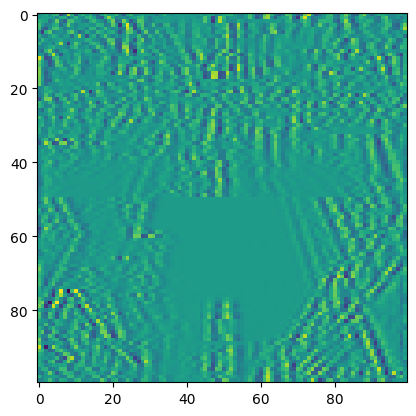

In [22]:
import pickle
import matplotlib.pyplot as plt

shp_original_img = (100,100)
broken_image = torch.FloatTensor(pickle.load(open('broken_image_t.p','rb'),encoding='latin1'))

plt.imshow(broken_image.view(100,100))

In [26]:
def weird_function(x, n_iter=5):
    h = x
    filt = torch.tensor([-1./3, 1./3, -1./3])
    for i in range(n_iter):
        zero_tensor = torch.tensor([1.0*0])
        h_l = torch.cat((zero_tensor, h[:-1]), 0)
        h_r = torch.cat((h[1:], zero_tensor), 0)
        h = filt[0]*h + filt[2]*h_l + filt[1]*h_r
        if i % 2 == 0:
            h = torch.cat((h[h.shape[0]//2:],h[:h.shape[0]//2]),0)
    return h



In [27]:
def distance_loss(hypothesis, broken_image):
    return torch.dist(hypothesis, broken_image)

random_tensor = torch.randn(10000, dtype = torch.float)

lr = 0.8

for i in range(0,20000):
    random_tensor.requires_grad_(True)
    hypothesis = weird_function(random_tensor)
    loss = distance_loss(hypothesis, broken_image)
    loss.backward()

    with torch.no_grad():

        random_tensor = random_tensor - lr*random_tensor.grad

    if i % 1000 == 0:

        print('Loss at {} = {}'.format(i, loss.item()))

Loss at 0 = 12.334783554077148
Loss at 1000 = 1.143093466758728
Loss at 2000 = 0.5489790439605713
Loss at 3000 = 0.37982121109962463
Loss at 4000 = 0.2992750108242035
Loss at 5000 = 0.24946258962154388
Loss at 6000 = 0.21382109820842743
Loss at 7000 = 0.18568818271160126
Loss at 8000 = 0.1619480550289154
Loss at 9000 = 0.14099568128585815
Loss at 10000 = 0.12192470580339432
Loss at 11000 = 0.10418333858251572
Loss at 12000 = 0.0874166339635849
Loss at 13000 = 0.07138648629188538
Loss at 14000 = 0.05592809617519379
Loss at 15000 = 0.04092495143413544
Loss at 16000 = 0.02629532292485237
Loss at 17000 = 0.02115854062139988
Loss at 18000 = 0.02116607502102852
Loss at 19000 = 0.021167512983083725


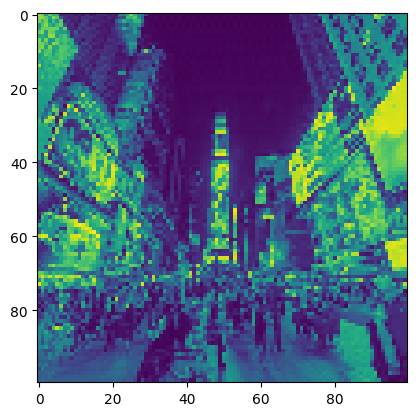

In [28]:
plt.imshow(random_tensor.view(100,100).data)